<a href="https://colab.research.google.com/github/DaverArenas/procesamientoSe-alesInteligenciaArtificial/blob/main/Clase1E2_10_09_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción Porqué es necesario procesar las señales?

## Descripción

- Se cree que la enfermedad de Parkinson (EP) afecta al menos a 100 personas de cada 100.000.
- Los síntomas cardinales de temblor, bradicinesia, inestabilidad postural y rigor resultan en discapacidad sustancial para pacientes con EP.
- Durante el curso de la enfermedad, hasta el 50% de los pacientes presentarán síntomas refractario a la medicación y experimentará discinesias inducidas por medicamentos
- La enfermedad de Parkinson (EP) está relacionada principalmente con la degeneración de la sustancia negra y, por lo tanto, insuficiencia de dopamina
- La progresión de la enfermedad provoca una disminución de la eficiencia de la terapia con L-DOPA (fluctuación de los síntomas intermitentes) y los neurólogos a menudo deciden clasificar a los pacientes para la cirugía de estimulación cerebral profunda (DBS)
- DBS implica la implantación quirúrgica de electrodos en estructuras profundas del cerebro para modular los circuitos cerebrales en un esfuerzo por restaurar la función fisiológica normal.
- El riesgo de errores en la localización del objetivo quirúrgico para la estimulación eléctrica cerebral profunda (DBS) requiere el uso de algún tipo de monitorización neurofisiológica intraoperatoria para confirmar el destino correcto durante la cirugía.
## Señales
- Se adquirieron registros de microelectrodos intraoperatorios en pacientes con Parkinson, despiertos y sin medicación, sujetos a implantación cerebral profunda bajo electroestimulación. Cinco pacientes (4 hombres y 1 mujer) de entre 55 +/- 6 años participaron de forma voluntaria asumiendo el consentimiento previamente firmado
- El tiempo de adquisición para cada registro fue de 2 segundos con una frecuencia de muestreo de 24 KHz (24.000 muestras por segundo). En total, la base de datos comprende 52 micrograbaciones, 13 para cada una de las estructuras subcorticales: Núcleo del tálamo (TAL), Zona Incerta (Zi), Núcleo subtalámico (STN) y Substantia Nigra (SNR).
## Matriz de características 
- Como se mencionó anteriormente cuando presentamos la base de datos, cada registro se adquirió durante 2 segundos a una frecuencia de muestreo de 24 KHz, lo que lleva a que cada registro tenga 48,000 muestras.

- Si consideramos una trayectoria de 13 registros para cada una de las estructuras subcorticales:
Núcleo de tálamo (TAL), Zona Incerta (Zi), Núcleo subtalámico (STN) y Substantia Nigra (SNR), la trayectoria final está compuesta por 52 registros y tiene un total de 2.496.000 muestras

- A continuación, la trayectoria final se divide en ventanas 4.992 muestras consecutivas y para cada una de estas ventanas se determinan las seis características principales, dando un total de 500 instancias (patrones) por característica. 

La descomposición descrita anteriormente se presenta en forma de matriz de la siguiente manera:


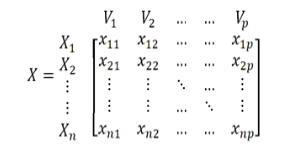

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/Colab Notebooks/2022_II_signal_processing/Clase_1/Matrix.PNG', width=400)

In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
readdata = pandas.read_csv('/content/drive/MyDrive/Especializacion BigData EIA/Procesamiento_Señales/BDParkinson_Prediction.csv')
dataset = pandas.DataFrame(readdata, columns=['VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6', 'CLASS'])
print(dataset.shape)

(500, 7)


In [4]:
dataset.head()

,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,CLASS
0,0.624731,0.135424,0.0,0.675282,0.182203,0.962960,Class_1
1,0.647223,0.136211,0.0,0.679511,0.195903,0.987387,Class_1
2,0.706352,0.187593,0.0,0.632989,0.244884,0.991182,Class_1
3,0.680291,0.192076,0.0,0.651786,0.233528,0.991857,Class_1
4,0.660104,0.161131,0.0,0.677162,0.209531,0.991066,Class_1


Resumen estadístico de las variables



In [5]:
dataset.describe()

,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.735121,0.197308,0.467928,0.696034,0.282903,0.314853
std,0.075174,0.068170,0.302631,0.144894,0.105843,0.391511
min,0.613236,0.109302,0.000000,0.515038,0.140636,0.045782
25%,0.671658,0.134198,0.274775,0.576128,0.216137,0.090241
50%,0.716317,0.218196,0.527671,0.642387,0.268986,0.102930
75%,0.805635,0.246461,0.585586,0.737429,0.341426,0.616969
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Distribución de las clases


In [6]:
dataset.groupby('CLASS').size()

CLASS
Class2     125
Class_1    125
Class_3    125
Class_4    125
dtype: int64

# Evaluación de algoritmos
Ahora vamos a crear algunos modelos y vamos a estimar la precisión con los datos de entrenamiento.
Para esto vamos a realizar el siguiente procedimiento:
- Separar un conjunto de datos para realizar la validación. 
- Configurar el test de validación cruzada.
- Seleccionar el mejor modelo. 

Separación de la base de datos


In [7]:
array = dataset.values
X = array[:,0:6]
Y = array[:,6]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

Ahora tenemos lo datos de entrenamiento 

```
X_train, Y_train
```
Y los datos de validación 

```
X_validation, Y_validation
```

Recordemos que vamos a utilizar una validación cruzada de 10 veces para estimar la precisión. Esto dividirá nuestro conjunto de datos en 10 partes, entrenará 9 y probará en 1 y se repetirá para todas las divisiones de prueba-entrenamientoa

Opciones de prueba y métricas de evaluación 


In [8]:
scoring = 'accuracy'

Utilizaremos la métrica de precisión para evaluar los modelos. Esta es una proporción de la cantidad de instancias predichas correctamente dividida por la cantidad de instancias en el conjunto de datos multiplicado por 100 para dar un porcentaje (Ej. 99% de precisión).

Usaremos la variable de puntuación cuando ejecutemos y evaluemos cada modelo. 


### Construcción de modelos

Como no sabemos que algoritmos serán buenos para este problema o que configuraciones se deben usar, se pueden hacer gráficas para ver que clases la separación de las clases. 

Se van a evaluar 5 modelos 
- Logistic Regression (LR)
- Linear Discriminant Analysis (LDA)
- K-Nearest Neighbors (KNN).
- Gaussian Naive Bayes (NB).
- Support Vector Machines (SVM).

También te dejo el  [cheat sheet](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)
 de scikit-learn como herramienta base para que selecciones los modelos a utilizar.

In [9]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

Evaluación de cada modelo

In [10]:
import warnings
warnings.filterwarnings("ignore")

results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.962500 (0.032113)
LDA: 0.992500 (0.011456)
KNN: 0.992500 (0.011456)
NB: 0.975000 (0.022361)
SVM: 0.975000 (0.019365)


Vamos a crear un gráfico de los resultados de la evaluación del modelo y comparar la dispersión y la precisión media de cada modelo. 
Existe una población de medidas de precisión para cada algoritmo porque cada algoritmo se evaluó 10 veces (validación cruzada).

In [11]:
import plotly.offline as pyo
import plotly.graph_objs as go

In [12]:
results

[array([0.975, 0.975, 1.   , 0.925, 0.975, 1.   , 0.925, 1.   , 0.925,
        0.925]),
 array([1.   , 1.   , 0.975, 0.975, 1.   , 1.   , 1.   , 1.   , 1.   ,
        0.975]),
 array([0.975, 1.   , 1.   , 1.   , 1.   , 1.   , 0.975, 1.   , 1.   ,
        0.975]),
 array([0.975, 0.975, 1.   , 1.   , 1.   , 0.95 , 0.975, 0.975, 0.975,
        0.925]),
 array([0.975, 0.975, 1.   , 0.975, 0.975, 1.   , 0.95 , 1.   , 0.95 ,
        0.95 ])]

In [13]:
x0 = results[0]
x1 = results[1]
x2 = results[2]
x3 = results[3]
x4 = results[4]

trace1 = go.Box(name="LR",  x=x0)
trace2 = go.Box(name="LDA", x=x1)
trace3 = go.Box(name="KNN", x=x2)
trace4 = go.Box(name="NB",  x=x3)
trace5 = go.Box(name="SVM", x=x4)

data = [trace1, trace2,trace3, trace4, trace5]

layout = go.Layout(boxmode='group')
fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig)

## Predicciones 

Los algoritmos KNN y LDA fueron los modelos más preciso. Ahora queremos tener una idea de la precisión del modelo en nuestro conjunto de validación.

Esto nos dará una verificación final independiente de la precisión del mejor modelo. Es valioso mantener un conjunto de validación por si acaso cometiste un desliz durante el entrenamiento, como un ajuste excesivo al conjunto de entrenamiento o una fuga de datos. Ambos darán lugar a un resultado demasiado optimista.

Podemos ejecutar el modelo KNN directamente en el conjunto de validación y resumir los resultados como una puntuación de precisión final, una matriz de confusión y un informe de clasificación.


In [14]:
KNN = KNeighborsClassifier()
KNN.fit(X_train, Y_train)
predictions = KNN.predict(X_validation)
print("Exactitud: ", accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

Exactitud:  1.0
[[26  0  0  0]
 [ 0 22  0  0]
 [ 0  0 22  0]
 [ 0  0  0 30]]
              precision    recall  f1-score   support

      Class2       1.00      1.00      1.00        26
     Class_1       1.00      1.00      1.00        22
     Class_3       1.00      1.00      1.00        22
     Class_4       1.00      1.00      1.00        30

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



Podemos ver que la precisión es 1,00 o 100%. 
El informe de clasificación proporciona un desglose de cada clase por precisión, recall, puntaje f1 y soporte, mostrando excelentes resultados.

In [ ]:
#Regression logistica
LR = LogisticRegression()
LR.fit(X_train, Y_train)
predictions = LR.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.92
[[22  0  4  0]
 [ 0 22  0  0]
 [ 0  0 22  0]
 [ 0  0  4 26]]
              precision    recall  f1-score   support

      Class2       1.00      0.85      0.92        26
     Class_1       1.00      1.00      1.00        22
     Class_3       0.73      1.00      0.85        22
     Class_4       1.00      0.87      0.93        30

    accuracy                           0.92       100
   macro avg       0.93      0.93      0.92       100
weighted avg       0.94      0.92      0.92       100



In [15]:
#LinearDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, Y_train)
predictions = LDA.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

1.0
[[26  0  0  0]
 [ 0 22  0  0]
 [ 0  0 22  0]
 [ 0  0  0 30]]
              precision    recall  f1-score   support

      Class2       1.00      1.00      1.00        26
     Class_1       1.00      1.00      1.00        22
     Class_3       1.00      1.00      1.00        22
     Class_4       1.00      1.00      1.00        30

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [16]:
#GaussianNB
NB = GaussianNB()
NB.fit(X_train, Y_train)
predictions = NB.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.98
[[26  0  0  0]
 [ 0 22  0  0]
 [ 0  0 21  1]
 [ 0  0  1 29]]
              precision    recall  f1-score   support

      Class2       1.00      1.00      1.00        26
     Class_1       1.00      1.00      1.00        22
     Class_3       0.95      0.95      0.95        22
     Class_4       0.97      0.97      0.97        30

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



In [17]:
#SVM
SVM = SVC()
SVM.fit(X_train, Y_train)
predictions = SVM.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.96
[[26  0  0  0]
 [ 0 22  0  0]
 [ 0  0 22  0]
 [ 0  0  4 26]]
              precision    recall  f1-score   support

      Class2       1.00      1.00      1.00        26
     Class_1       1.00      1.00      1.00        22
     Class_3       0.85      1.00      0.92        22
     Class_4       1.00      0.87      0.93        30

    accuracy                           0.96       100
   macro avg       0.96      0.97      0.96       100
weighted avg       0.97      0.96      0.96       100

